In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('loan_sanction_train.csv')

In [3]:
data_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data_train.shape

(614, 13)

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
def data_proflileing(df):
    data_profile = []
    columns = df.columns
    for col in columns:
        dtype = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        duplicates = df[col].duplicated().sum()
        data_profile.append([col,dtype,nunique,null,duplicates])
    data_profile_finding = pd.DataFrame(data_profile)
    data_profile_finding.columns = ['column','dtype','nunique','null','duplicates']
    return data_profile_finding

In [9]:
data_proflileing(data_train)

,column,dtype,nunique,null,duplicates
0,Loan_ID,object,614,0,0
1,Gender,object,2,13,611
2,Married,object,2,3,611
3,Dependents,object,4,15,609
4,Education,object,2,0,612
5,Self_Employed,object,2,32,611
6,ApplicantIncome,int64,505,0,109
7,CoapplicantIncome,float64,287,0,327
8,LoanAmount,float64,203,22,410
9,Loan_Amount_Term,float64,10,14,603


In [10]:
for i in data_train.columns:
    print(data_train[i].nunique)

<bound method IndexOpsMixin.nunique of 0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object>
<bound method IndexOpsMixin.nunique of 0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object>
<bound method IndexOpsMixin.nunique of 0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object>
<bound method IndexOpsMixin.nunique of 0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object>
<bound method IndexOpsMixin.nunique of 0          Graduate
1          Graduate
2          Graduate
3      Not

# EDA

<Axes: xlabel='Loan_Status', ylabel='count'>

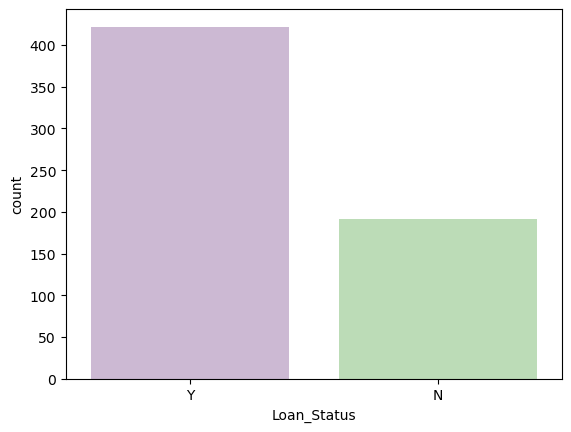

In [11]:
sns.countplot(data=data_train,x='Loan_Status',palette='PRGn')

<Axes: xlabel='Gender', ylabel='count'>

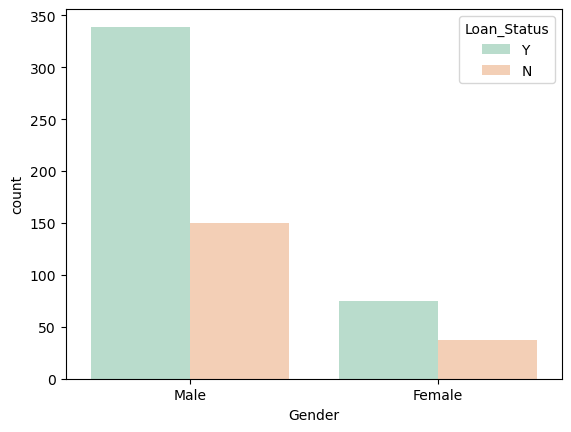

In [12]:

sns.countplot(data=data_train,x='Gender',hue='Loan_Status',palette='Pastel2')

<Axes: xlabel='Married', ylabel='count'>

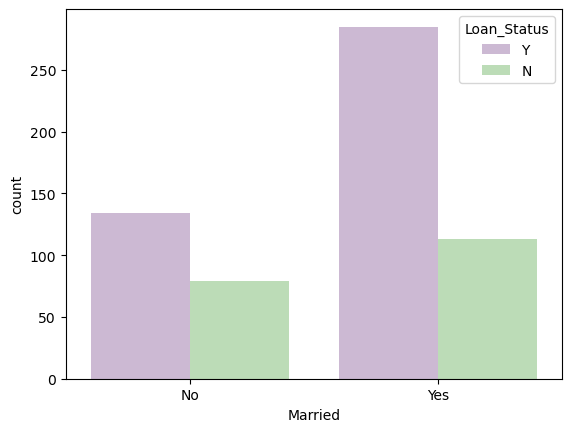

In [13]:
sns.countplot(data=data_train,x='Married',hue='Loan_Status',palette='PRGn')

<Axes: xlabel='Dependents', ylabel='count'>

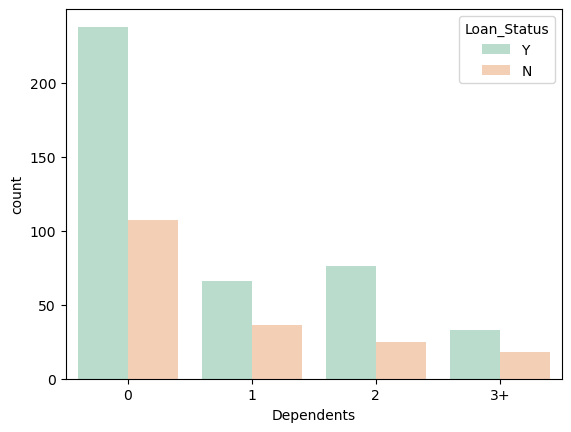

In [14]:
sns.countplot(data=data_train,x='Dependents',hue='Loan_Status',palette='Pastel2')

<Axes: xlabel='Education', ylabel='count'>

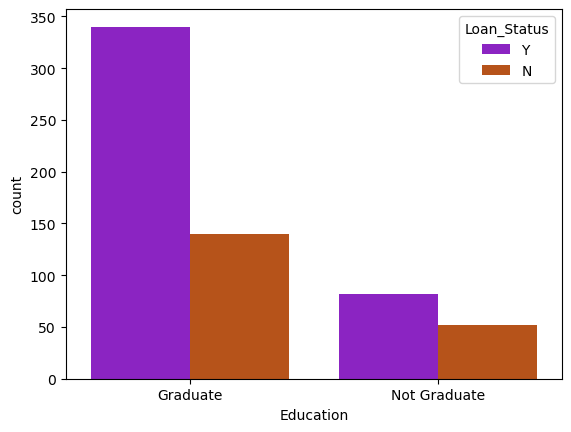

In [15]:
sns.countplot(data=data_train,x='Education',hue='Loan_Status',palette='gnuplot')

<Axes: xlabel='Self_Employed', ylabel='count'>

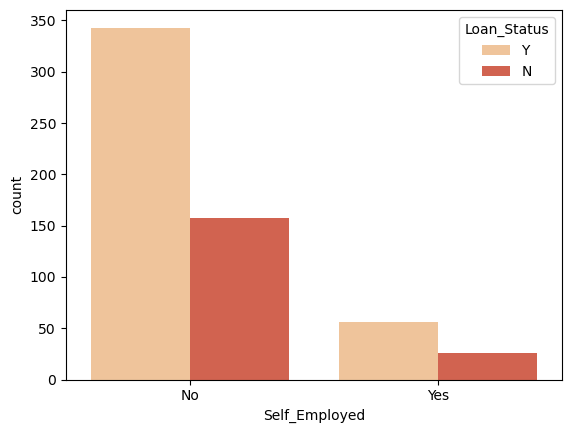

In [16]:
sns.countplot(data=data_train,x='Self_Employed',hue='Loan_Status',palette='OrRd')

# Encoding

In [18]:
gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = {'No' : 0,'Yes' : 1}
dependents_stat = {'0':0,'1':1,'2':2,'3+':3}
education_stat = {'Not Graduate' : 0, 'Graduate' : 1}
property_stat = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}

data_train['Gender'] = data_train['Gender'].replace(gender_stat)
data_train['Married'] = data_train['Married'].replace(yes_no_stat)
data_train['Dependents'] = data_train['Dependents'].replace(dependents_stat)
data_train['Education'] = data_train['Education'].replace(education_stat)
data_train['Self_Employed'] = data_train['Self_Employed'].replace(yes_no_stat)
data_train['Property_Area'] = data_train['Property_Area'].replace(property_stat)

In [19]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,Y


In [20]:
data_train['Loan_Status'] = data_train['Loan_Status'].replace({'Y':1,'N':0})

# Spliting Data

In [25]:
X =data_train.drop(['Loan_ID','Loan_Status'],axis=1)
y =data_train['Loan_Status']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

##  Handling/Imputing Missing values

In [27]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

## Scaling of numerical columns

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc= StandardScaler()

In [30]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


## Model Building

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

In [32]:
def classalgo_test(x_train,x_test,y_train,y_test): #classification
      
    g=GaussianNB()
    b=BernoulliNB()
    kc=KNeighborsClassifier()
    lr=LogisticRegression()
    dc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    gbc=GradientBoostingClassifier()
    xgb=XGBClassifier()
    Bagging=BaggingClassifier()
    AdaBoost=AdaBoostClassifier()
    
    algos = [g,b,kc,lr,dc,rfc,gbc,xgb,Bagging,AdaBoost]
    algo_names = ['GaussianNB','BernoulliNB','KNeighborsClassifier','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','BaggingClassifier','XGBClassifier','AdaBoostClassifier']
    Train_acc=[]
    Train_precsc=[]
    Train_fsc=[]
    Train_Recall=[]
    Test_acc=[]
    Test_precsc=[]
    Test_fsc=[]
    Test_Recall=[]
    Test_AUC=[]
    
    result = pd.DataFrame(index = algo_names)
    
    for algo in algos:
    
        algo.fit(x_train,y_train)
        y_train_pred = algo.predict(x_train)
        y_test_pred = algo.predict(x_test)
        Train_acc.append(accuracy_score(y_train,y_train_pred))
        Train_precsc.append(precision_score(y_train,y_train_pred))
        Train_fsc.append(f1_score(y_train,y_train_pred))
        Train_Recall.append(recall_score(y_train,y_train_pred,average='micro'))
        
        
        Test_acc.append(accuracy_score(y_test,y_test_pred))
        Test_precsc.append(precision_score(y_test,y_test_pred))
        Test_fsc.append(f1_score(y_test,y_test_pred))
        Test_Recall.append(recall_score(y_test,y_test_pred,average='micro'))
        Test_AUC.append(roc_auc_score(y_test,y_test_pred))
        
    
    result['Train_Accuracy Score'] = Train_acc
    result['Train_Precision Score'] = Train_precsc
    result['Train_F1Score']= Train_fsc
    result['Train_Recall']= Train_Recall    
    result['Test_Accuracy Score'] = Test_acc
    result['Test_Precision Score'] = Test_precsc
    result['Test_F1Score']= Test_fsc
    result['Test_Recall']= Test_Recall
    result['Test_AUC_Score']= Test_AUC
        
    return result.sort_values('Test_Accuracy Score', ascending=False)

In [34]:
classalgo_test(X_train,X_test_imp,y_train,y_test)

,Train_Accuracy Score,Train_Precision Score,Train_F1Score,Train_Recall,Test_Accuracy Score,Test_Precision Score,Test_F1Score,Test_Recall,Test_AUC_Score
BernoulliNB,0.759674,0.781491,0.837466,0.759674,0.853659,0.831683,0.903226,0.853659,0.770433
AdaBoostClassifier,0.845214,0.837209,0.895028,0.845214,0.691057,0.691057,0.817308,0.691057,0.500000
KNeighborsClassifier,0.824847,0.809877,0.884097,0.824847,0.658537,0.697248,0.783505,0.658537,0.512848
BaggingClassifier,1.000000,1.000000,1.000000,1.000000,0.552846,0.682927,0.670659,0.552846,0.487307
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.365854,0.585366,0.380952,0.365854,0.417492
GradientBoostingClassifier,0.892057,0.865979,0.926897,0.892057,0.365854,0.594595,0.360656,0.365854,0.432043
GaussianNB,0.782077,0.781863,0.856376,0.782077,0.308943,0.000000,0.000000,0.308943,0.500000
LogisticRegression,0.802444,0.784360,0.872200,0.802444,0.308943,0.000000,0.000000,0.308943,0.500000
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.308943,0.000000,0.000000,0.308943,0.500000
XGBClassifier,0.981670,0.993976,0.986547,0.981670,0.268293,0.428571,0.250000,0.268293,0.325077


In [38]:
br =BernoulliNB()

In [39]:
br.fit(X_train,y_train)

BernoulliNB()

In [41]:
br_pred = br.predict(X_test_imp)

In [44]:
print(confusion_matrix(y_test,br_pred))

[[21 17]
 [ 1 84]]


In [46]:
import pickle

In [47]:
pickle.dump(br,open('br_prediction_model.pkl','wb'))
pickle.dump(sc,open('scaler.pkl','wb'))

pickle.dump(imp ,open('scaler.pkl','wb'))
